# **Ejercicio 1: Manipulación de datos con Pandas y conjunto de datos de COVID-19**

Utiliza Pandas y el conjunto de datos público de COVID-19 proporcionado por la
Universidad de Johns Hopkins para realizar las siguientes tareas:

1.Descarga los datos de COVID-19 en formato CSV o JSON desde la URL
pública.

2.Carga los datos en un DataFrame de Pandas.

3.Calcula el promedio de casos confirmados por día en un país específico.

4.Encuentra los 10 países con la tasa de mortalidad más alta (número de
muertes / número de casos confirmados) hasta la fecha.

Puedes encontrar el conjunto de datos de COVID-19 en la URL pública, como la
ofrecida por la Universidad de Johns Hopkins:
https://github.com/CSSEGISandData/COVID-19

Montar Google Drive y definir carpeta de trabajo

In [13]:
from google.colab import drive
import os

drive.mount('/content/drive')

carpeta = "/content/drive/MyDrive/Data Engineering Test"
os.chdir(carpeta)
print("Directorio actual:", os.getcwd())
print("Archivos en la carpeta:", os.listdir())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directorio actual: /content/drive/MyDrive/Data Engineering Test
Archivos en la carpeta: ['Ejercicio 1.ipynb', 'ejercicio2 vuelos.ipynb', 'Teoria.ipynb', 'ejercicio 4.ipynb', 'Ejercicio3.ipynb', 'time_series_covid19_confirmed_global.csv', 'time_series_covid19_deaths_global.csv']


Importar librerías y cargar datasets

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [18]:
#Casos confirmados globales
df_casos_confirmados = pd.read_csv("time_series_covid19_confirmed_global.csv")
#Muertos globales
df_casos_muerte = pd.read_csv("time_series_covid19_deaths_global.csv")

Cargar CSV en DataFrames y mostrar primeras 5 filas de Casos Confirmados

In [19]:
display(df_casos_confirmados.head(5).style.set_caption("Casos Confirmados Globales") \
        .set_table_styles([{'selector':'th','props':'font-size:12pt; text-align:center;'}]))


Mostrar primeras 5 filas de Muertes

In [20]:
display(df_casos_muerte.head(5).style.set_caption("Muertes Globales") \
        .set_table_styles([{'selector':'th','props':'font-size:12pt; text-align:center;'}]))

Calcular y visualizar el promedio diario de casos confirmados de COVID-19 en China.

Tabla: Promedio de Casos Confirmados Diarios en China


,Fecha,Promedio_Casos
0,2020-01-22,548.0
1,2020-01-23,643.0
2,2020-01-24,920.0
3,2020-01-25,1406.0
4,2020-01-26,2075.0
5,2020-01-27,2877.0
6,2020-01-28,5509.0
7,2020-01-29,6087.0
8,2020-01-30,8141.0
9,2020-01-31,9802.0


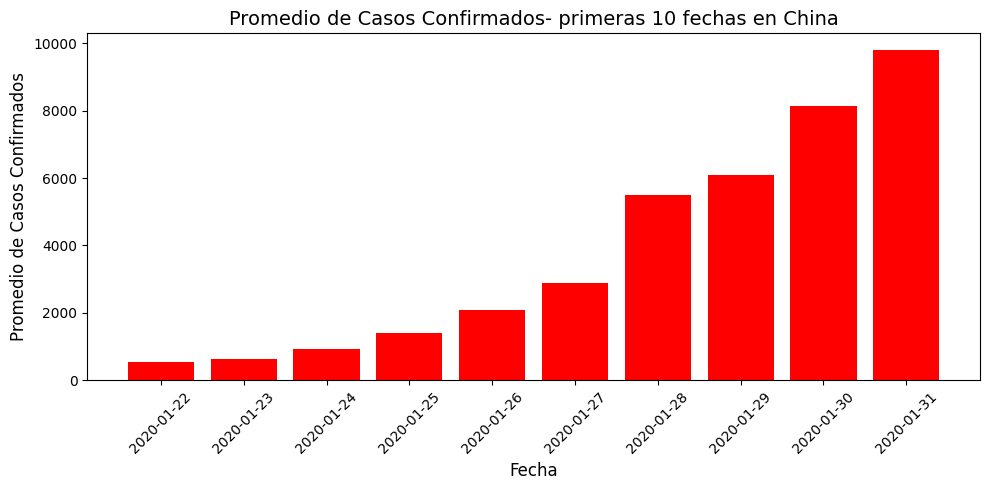

In [24]:
pais = "China"
df_pais = df_casos_confirmados[df_casos_confirmados['Country/Region'] == pais]
cols_fechas = df_casos_confirmados.columns[4:]
df_pais = df_pais.groupby("Country/Region")[cols_fechas].sum().fillna(0)
promedio_diario = df_pais.mean(axis=0)

df_promedio = pd.DataFrame({
    'Fecha': pd.to_datetime(cols_fechas, format="%m/%d/%y"),
    'Promedio_Casos': promedio_diario.values
})

# Mostramos la tabla
print("Tabla: Promedio de Casos Confirmados Diarios en China")
display(df_promedio.head(10))

# Creamos una Gráfica de barras - primeras 10 fechas
df_top10 = df_promedio.head(10)
plt.figure(figsize=(10,5))
plt.bar(df_top10['Fecha'].dt.strftime('%Y-%m-%d'), df_top10['Promedio_Casos'], color='red')
plt.xticks(rotation=45)
plt.title("Promedio de Casos Confirmados- primeras 10 fechas en China", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Promedio de Casos Confirmados", fontsize=12)
plt.tight_layout()
plt.show()

Análisis de muertes y tasa de mortalidad eliminando solo países con 0 casos

Top 10 países con mayor tasa de mortalidad (COVID-19)


,Country/Region,Casos_Confirmados,Muertes,Tasa_Mortalidad
93,"Korea, North",1,6,600.00%
107,MS Zaandam,9,2,22.22%
198,Yemen,"11,945","2,159",18.07%
169,Sudan,"63,829","5,017",7.86%
174,Syria,"57,467","3,164",5.51%
164,Somalia,"27,324","1,361",4.98%
141,Peru,"4,487,553","219,539",4.89%
54,Egypt,"515,759","24,812",4.81%
117,Mexico,"7,483,444","333,188",4.45%
22,Bosnia and Herzegovina,"401,729","16,280",4.05%


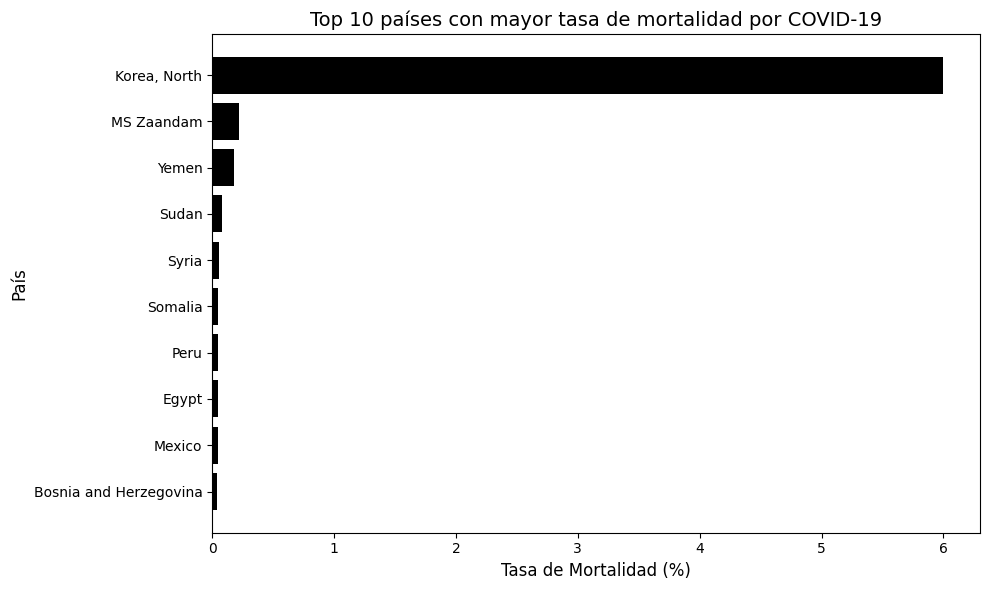

In [27]:
# Se agrupara por país y quedarse con la última fecha (totales acumulados)
df_casos_confirmados_total = df_casos_confirmados.groupby("Country/Region").sum(numeric_only=True).iloc[:, -1]
df_casos_muerte_total = df_casos_muerte.groupby("Country/Region").sum(numeric_only=True).iloc[:, -1]

df_mortalidad = pd.DataFrame({
    "Casos_Confirmados": df_casos_confirmados_total,
    "Muertes": df_casos_muerte_total
}).reset_index()

# Eliminar países con 0 casos confirmados
df_mortalidad = df_mortalidad[df_mortalidad["Casos_Confirmados"] > 0]

df_mortalidad["Tasa_Mortalidad"] = df_mortalidad["Muertes"] / df_mortalidad["Casos_Confirmados"]

# Ordenar de mayor a menor y tomar top 10
top10_mortalidad = df_mortalidad.sort_values("Tasa_Mortalidad", ascending=False).head(10)

# Mostrar tabla
print("Top 10 países con mayor tasa de mortalidad (COVID-19)")
display(
    top10_mortalidad.style.format({
        "Casos_Confirmados": "{:,.0f}",
        "Muertes": "{:,.0f}",
        "Tasa_Mortalidad": "{:.2%}"
    }).background_gradient(cmap="Reds", subset=["Tasa_Mortalidad"])
)

# Gráfica de barras horizontal
plt.figure(figsize=(10,6))
plt.barh(top10_mortalidad["Country/Region"], top10_mortalidad["Tasa_Mortalidad"], color="black")
plt.xlabel("Tasa de Mortalidad (%)", fontsize=12)
plt.ylabel("País", fontsize=12)
plt.title("Top 10 países con mayor tasa de mortalidad por COVID-19", fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()